In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

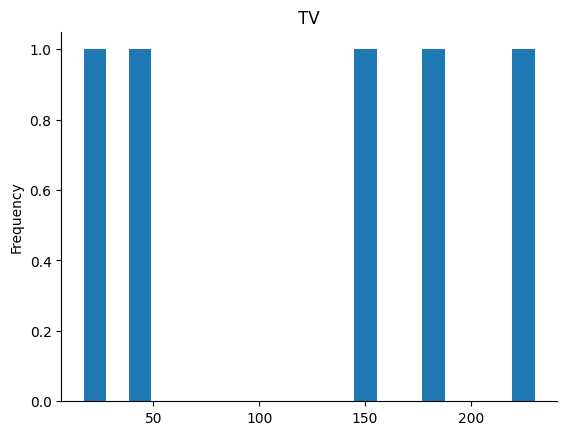

In [8]:
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

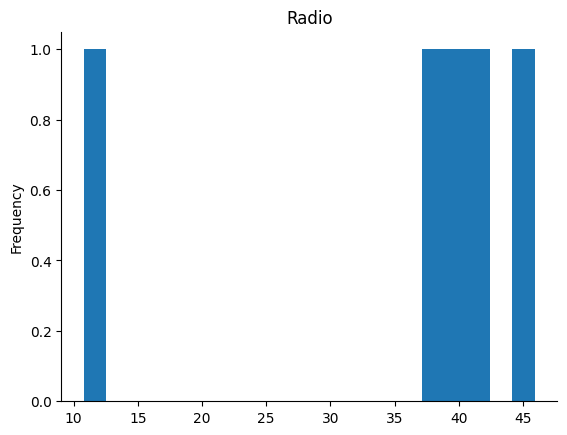

In [9]:
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

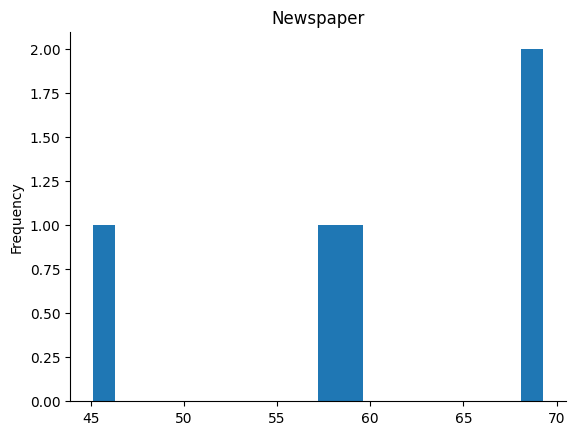

In [10]:
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

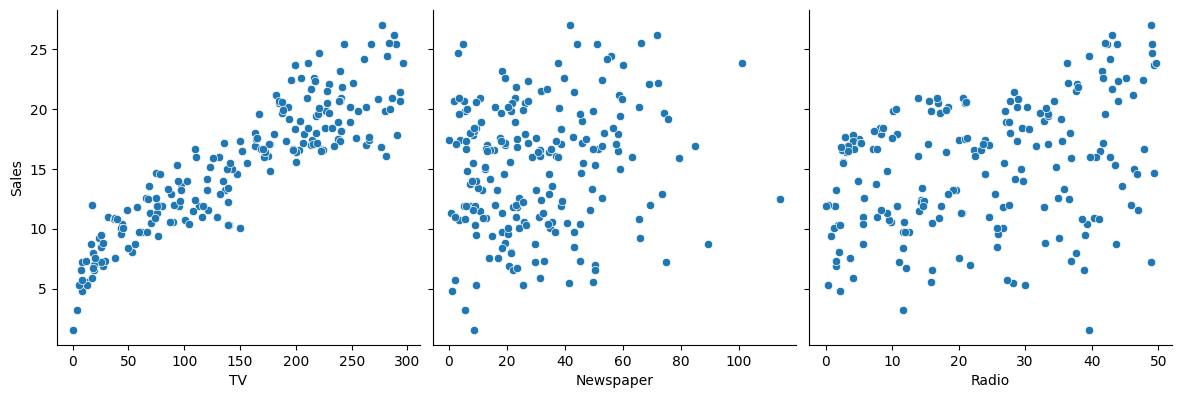

In [12]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

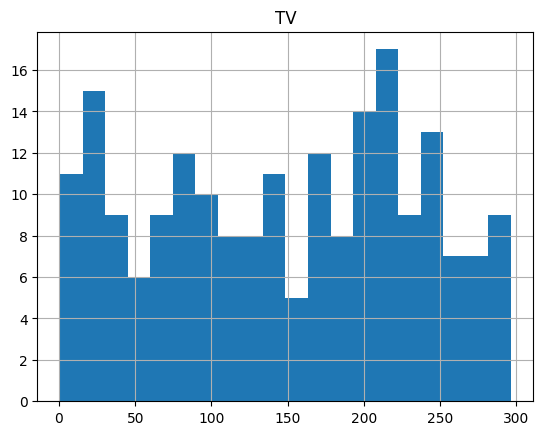

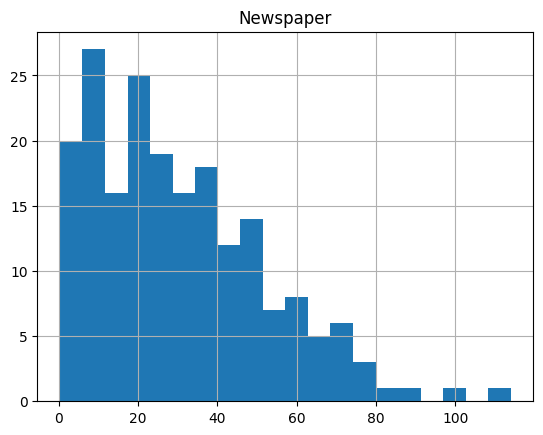

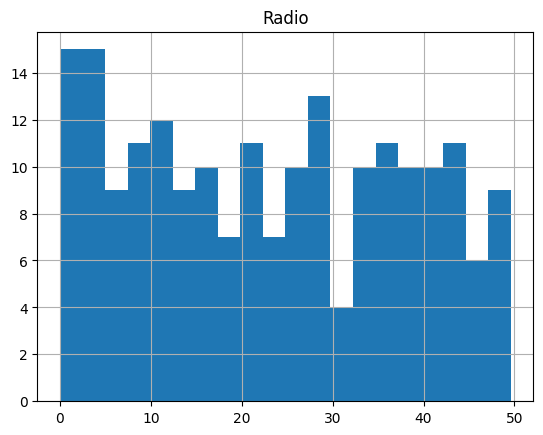

In [13]:
for col in ['TV', 'Newspaper', 'Radio']:
  data[col].hist(bins=20)
  plt.title(col)
  plt.show()

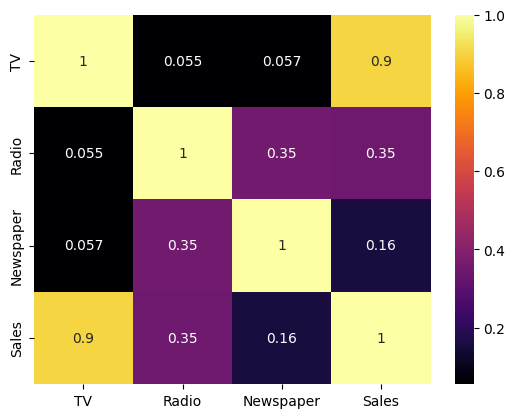

In [16]:
sns.heatmap(data.corr(), cmap="inferno", annot = True)
plt.show()

<Axes: ylabel='TV'>

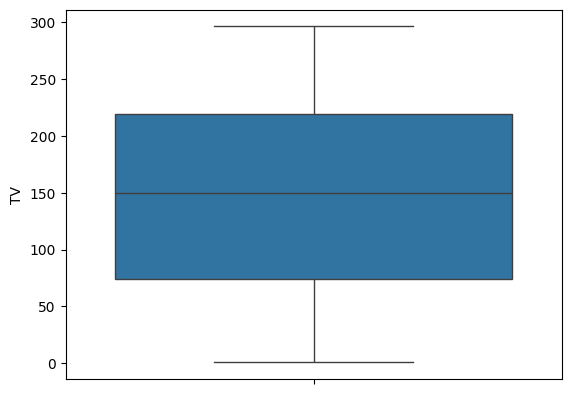

In [22]:
sns.boxplot(data['TV'])

<Axes: ylabel='Radio'>

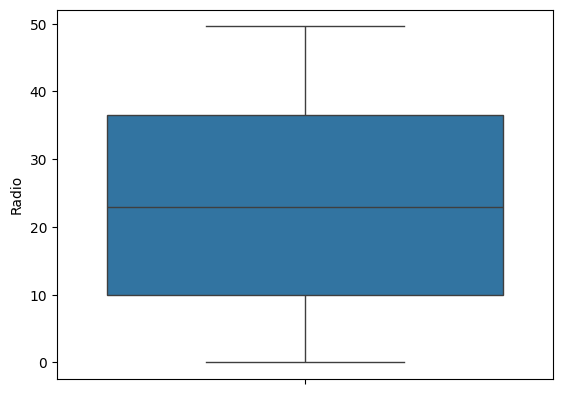

In [23]:
sns.boxplot(data['Radio'])

<Axes: ylabel='Newspaper'>

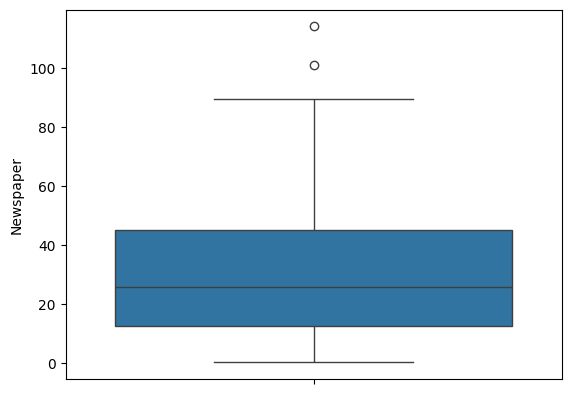

In [24]:
sns.boxplot(data['Newspaper'])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [26]:
X = data[['TV', 'Newspaper', 'Radio']]
y = data['Sales']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [32]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
print("Linear Regression Model Evaluation:")
evaluate_model(lr_model, X_test_scaled, y_test)
print("\nRandom Forest Regression Model Evaluation:")
evaluate_model(rf_model, X_test_scaled, y_test)

Linear Regression Model Evaluation:
Mean Absolute Error: 1.2748262109549344
Mean Squared Error: 2.9077569102710923
Root Mean Squared Error: 1.7052146229349232

Random Forest Regression Model Evaluation:
Mean Absolute Error: 0.9191249999999993
Mean Squared Error: 1.4451457750000003
Root Mean Squared Error: 1.2021421608944594
